<a href="https://colab.research.google.com/github/Jorgee18/ADA-Informes/blob/main/BucketSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema de ordenamiento**
**Entrada**: Un conjunto de n numeros $[a_1,a_2,...,a_n]$.

**Salida**: Secuencia ordenada de la entrada $[a_1',a_2',...,a_n']$ de forma que quede cada numero al momento de su salida sea menor al anterior $a_1'\leq a_2' \leq... \leq a_n'$. 

El algoritmo BucketSort es un metodo de ordenamiento donde mediante el uso de divide y venceras realiza el ordenamiento de una secuencia de numeros, retornando dicha secuencia ordenada de menor a mayor.

Este tipo de algoritmos puede ser utilizado tanto para valores nuemricos como valores punto flotante, teniendo una semejanza con el agloritmo MergeSort debido a su uso de separacion de cada bucket para las operaciones de ordenamiento.

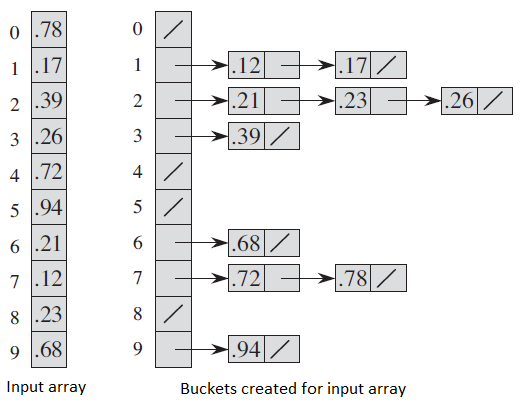

# 2.Algoritmo
El siguiente codigo muestra la implementacion en codigo del metodo de ordenamiento **BucketSort**.


In [1]:
import random as rd
import matplotlib.pyplot as plt
import datetime
import math as mt
from timeit import repeat
from termcolor import colored
import statistics as st

In [24]:
def insertionSort(b, verbose, cont):
    for i in range(1, len(b)):
        actual = b[i] #Numero actual con el que se comparara.
        j = i - 1
        cont+= 1
        if verbose:
          if b[j] > actual:
            print("Debido a que ",colored(f"{str(b[j])}","green"), ">",colored(f"{str(b[i])}","green"))
            print("Se realiza un cambio en el orden del bucket")
          else:
            print("Debido a que ", colored(f"{str(b[j])}","green"), "<", colored(f"{str(b[i])}","green"))
            print("No se realiza un cambio en el orden del bucket")

        while j >= 0 and b[j] > actual: #Se realiza la comparacion para saber si este debe o no realizar un cambio.
            b[j + 1] = b[j] #En caso de ser asi realiza el cambio de posicion.
            j -= 1

        b[j + 1] = actual
        if verbose:
          if b[j] > actual:
            print("Nuevo orden bucket", colored(f"{str(b[:])}","red"))
            print("")
          else:
            print("Orden Actual", colored(f"{str(b[:])}","red"))
            print("") 

    #Retorna el arreglo ordenado de menor a mayor.
    return b, cont

In [58]:
#Algoritmo BucketSort
def BucketSort(a, verbose = False, cont = 0):
  aux = []
  largo = len(a)
  size = max(a) / largo
  if verbose:
    print("Arreglo de entrada",colored(f"{str(a[:])}","blue"))
    print('Implementacion BucketSort')
    print('')

  for i in range (0, largo): #Se genera el arreglo vacio
    aux.append([])
  if verbose:
    print("Creando un  arreglo donde se ingresen los numeros segun el 0.n")
  for j in a: #Se ingresan los numeros a sus posiciones correspondientes.
    if verbose:
     print("Numero:", j)
    variable = int(j / size)

    if variable != len(a):
        aux[variable].append(j)
        if verbose:
            print("Ingresado en la poscion:", variable, "Numero/s en dicha posicion", colored(f"{str(aux[variable])}","yellow"))
            print('')
    else:
        aux[len(a) - 1].append(j)
        if verbose:
            print("Ingresado en la poscion:", variable, "Numero/s en dicha posicion", colored(f"{str(aux[len(a) - 1])}","yellow"))
            print('')


  if verbose:
    print("Dejando un arreglo auxiliar de la siguiente forma:", colored(f"{str(aux[:])}","blue"))
    print('')

  if verbose:
    print('Implementacion InsertionSort')
    print("Para los bucket de largo 1 no se realizan comparaciones para el ordenamiento")
    print("")

  for z in range (largo):#Por medio de la utilizacion del InsertionSort ordena los numeros de menor a mayor.
    aux[z], cont= insertionSort(aux[z], verbose, cont)

  s = 0
  for p in range(largo):#Ingresa los numeros ordenados del arreglo auxiliar a el arreglo original.
    for k in range (len(aux[p])):
      a[s] = aux[p][k]
      s = s + 1
  if verbose:
    print("Arreglo resultante:", colored(f"{str(a[:])}","blue"), "Comparaciones:", cont)

  return a, cont

# 2.2. Descripcion del algoritmo
El algoritmo o codigo recibe inicialmente un arreglo de n elementos numericos que deben de ser ordenados mediante los siguientes pasos.

1. Crear una colección de casilleros vacíos.

2. Colocar cada elemento a ordenar en un único casillero.

3. Ordenar individualmente cada casillero.

4. Devolver los elementos de cada casillero en orden.


# 2.3. Ejemplo
$a = [0.78, 0.17, 0.44, 0.23, 0.43, 0.67, 0.75]$

El primer paso que realiza el algoritmo BucketSort es crear un arreglo vacio del tamaño del arreglo originial.

$a = [0.78, 0.17, 0.44, 0.23, 0.43, 0.67, 0.75]$

$b = [  [], [], [], [], [], [], [], [], [], [] ]$

Como segundo paso guardamos los numeros en cada bucket dependiendo de su numero despues de el 0.n.

$b = [  [], [0.17], [0.23], [], [0.44, 0.43], [], [0.67], [0.78, 0.75], [], [] ]$

Se ordena individualmente cada casillero y si dicho casillero tiene de largo 1 este estara ya ordenado.

$b = [  [], [0.17], [0.23], [], [0.43, 0.44], [], [0.67], [0.75, 0.78], [], [] ]$

Por ultimo se reingresan los valores al arreglo original de manera ordenada.

$a = [0.17, 0.23, 0.43, 0.44, 0.67, 0.75, 0.78]$



# 2.4. Ejecucion del algoritmo paso a paso (verbose=True)
Debido a esta opcion podemos ver el funcionamiento paso a paso en cada iteracion.

In [87]:
x = [0.897, 0.565, 0.656, 0.1234, 0.665, 0.3434, 0.865] 
x, cont = BucketSort(arr, True, 0)


Arreglo de entrada [2, 24, 45, 66, 75, 90, 170, 802]
Implementacion BucketSort

Creando un  arreglo donde se ingresen los numeros segun el 0.n
Numero: 2
Ingresado en la poscion: 0 Numero/s en dicha posicion [2]

Numero: 24
Ingresado en la poscion: 0 Numero/s en dicha posicion [2, 24]

Numero: 45
Ingresado en la poscion: 0 Numero/s en dicha posicion [2, 24, 45]

Numero: 66
Ingresado en la poscion: 0 Numero/s en dicha posicion [2, 24, 45, 66]

Numero: 75
Ingresado en la poscion: 0 Numero/s en dicha posicion [2, 24, 45, 66, 75]

Numero: 90
Ingresado en la poscion: 0 Numero/s en dicha posicion [2, 24, 45, 66, 75, 90]

Numero: 170
Ingresado en la poscion: 1 Numero/s en dicha posicion [170]

Numero: 802
Ingresado en la poscion: 8 Numero/s en dicha posicion [802]

Dejando un arreglo auxiliar de la siguiente forma: [[2, 24, 45, 66, 75, 90], [170], [], [], [], [], [], [802]]

Implementacion InsertionSort
Para los bucket de largo 1 no se realizan comparaciones para el ordenamiento

Debido a que 

En cada iteracion se recorre:

*   Elemento de la lista

Color azul: Arreglo/Arreglo Auxiliar/Arreglo Resultante.

Color amarillo: Numero que sera ingresado al bucket.

Color verde: Numeros que se estan comparando.

Color Rojo: Bucket que se esta ordenando.

#3. Tiempo de ejecución

##Teorema (Tiempo de ejecución).

El tiempo de ejecución del BucketSort en el mejor caso tiene una complejidad de $O(n)$, en el caso promedio $O(n + k)$ donde $k$ viene siendo la complejidad del algoritmo auxiliar y en el peor caso su complejidad es de $O(k)$.

##Prueba del teorema

**Analisis del peor caso**

Observando nuestro código podemos visualizar como el peor caso de este, viene siendo cuando la gran parte de nuestros elementos queda almacenado en 1 solo bucket de todos los disponibles, para lograr esto, el mayor dato del array debe tener una gran diferencia con el segundo más grande, como por ejemplo el siguiente arreglo.

$A = [1,4,2,8,5,3,1000]$

In [60]:
A = [1,4,2,8,5,3,1000]

A = BucketSort(A, True, 0)

Arreglo de entrada [1, 4, 2, 8, 5, 3, 1000]
Implementacion BucketSort

Creando un  arreglo donde se ingresen los numeros segun el 0.n
Numero: 1
Ingresado en la poscion: 0 Numero/s en dicha posicion [1]

Numero: 4
Ingresado en la poscion: 0 Numero/s en dicha posicion [1, 4]

Numero: 2
Ingresado en la poscion: 0 Numero/s en dicha posicion [1, 4, 2]

Numero: 8
Ingresado en la poscion: 0 Numero/s en dicha posicion [1, 4, 2, 8]

Numero: 5
Ingresado en la poscion: 0 Numero/s en dicha posicion [1, 4, 2, 8, 5]

Numero: 3
Ingresado en la poscion: 0 Numero/s en dicha posicion [1, 4, 2, 8, 5, 3]

Numero: 1000
Ingresado en la poscion: 7 Numero/s en dicha posicion [1000]

Dejando un arreglo auxiliar de la siguiente forma: [[1, 4, 2, 8, 5, 3], [], [], [], [], [], [1000]]

Implementacion InsertionSort
Para los bucket de largo 1 no se realizan comparaciones para el ordenamiento

Debido a que  1 < 4
No se realiza un cambio en el orden del bucket
Orden Actual [1, 4, 2, 8, 5, 3]

Debido a que  4 > 2
Se r

Como podemos apreciar gracias al verbose, todos datos menores al mayor quedan almacenado en un solo bucket, lo que provoca que el peor caso dependa unicamente del algoritmo de ordenamiento implementado ya que la idea de dividir por buckets no está cumpliendo su función, generando un complejidad de $O(k)$, en nuestro caso es de $O(n^2)$ por tener implementado el InsertionSort.

**Analisis del mejor caso**

El mejor caso ocurre cuando cada elemento de nuestro arreglo queda almacenado en su bucket correspondiente, esto ocurre cuando tenemos un arreglo de $n$ elementos los cuales sus datos vienen siendo los siguientes: $1,2,3,...,n-2,n$.

$A = [5,4,6,2,1,3]$


In [61]:
A = [5,4,7,2,1,3,6,8,10]

A = BucketSort(A, True, 0)

Arreglo de entrada [5, 4, 7, 2, 1, 3, 6, 8, 10]
Implementacion BucketSort

Creando un  arreglo donde se ingresen los numeros segun el 0.n
Numero: 5
Ingresado en la poscion: 4 Numero/s en dicha posicion [5]

Numero: 4
Ingresado en la poscion: 3 Numero/s en dicha posicion [4]

Numero: 7
Ingresado en la poscion: 6 Numero/s en dicha posicion [7]

Numero: 2
Ingresado en la poscion: 1 Numero/s en dicha posicion [2]

Numero: 1
Ingresado en la poscion: 0 Numero/s en dicha posicion [1]

Numero: 3
Ingresado en la poscion: 2 Numero/s en dicha posicion [3]

Numero: 6
Ingresado en la poscion: 5 Numero/s en dicha posicion [6]

Numero: 8
Ingresado en la poscion: 7 Numero/s en dicha posicion [8]

Numero: 10
Ingresado en la poscion: 9 Numero/s en dicha posicion [10]

Dejando un arreglo auxiliar de la siguiente forma: [[1], [2], [3], [4], [5], [6], [7], [8], [10]]

Implementacion InsertionSort
Para los bucket de largo 1 no se realizan comparaciones para el ordenamiento

Arreglo resultante: [1, 2, 3, 4, 

Con la ayuda del verbose podemos verificar que el mejor caso viene siendo el dicho anteriormente, considerando que solo el BucketSort tienen una complejidad de $O(n)$ al insertar los elementos dentro de los buckets, al intentar ordenar los buckets de largo 1, el algoritmo de ordenamiento asume directamente que el array se encuentra ordenado, teniendo así una complejidad de $O(1)$, esto provoca que la complejidad temporal de la función BucketSort en su mejor caso sea de $O(n)$.

**Analisis del caso promedio**

Este último caso ocurre cuando todos los datos de nuestro arreglo se encuentran distribuidos uniformemente dentro los buckets, como por ejemplo.

$A = [1,2,3,5,6,7,10,12,15]$

In [62]:
A = [1.5,1.6,2.1,2.3,2.4,3.4,5.1,6,3.1,1.51,1.61,1.9,1.923]

A = BucketSort(A, True, 0)

Arreglo de entrada [1.5, 1.6, 2.1, 2.3, 2.4, 3.4, 5.1, 6, 3.1, 1.51, 1.61, 1.9, 1.923]
Implementacion BucketSort

Creando un  arreglo donde se ingresen los numeros segun el 0.n
Numero: 1.5
Ingresado en la poscion: 3 Numero/s en dicha posicion [1.5]

Numero: 1.6
Ingresado en la poscion: 3 Numero/s en dicha posicion [1.5, 1.6]

Numero: 2.1
Ingresado en la poscion: 4 Numero/s en dicha posicion [2.1]

Numero: 2.3
Ingresado en la poscion: 4 Numero/s en dicha posicion [2.1, 2.3]

Numero: 2.4
Ingresado en la poscion: 5 Numero/s en dicha posicion [2.4]

Numero: 3.4
Ingresado en la poscion: 7 Numero/s en dicha posicion [3.4]

Numero: 5.1
Ingresado en la poscion: 11 Numero/s en dicha posicion [5.1]

Numero: 6
Ingresado en la poscion: 13 Numero/s en dicha posicion [6]

Numero: 3.1
Ingresado en la poscion: 6 Numero/s en dicha posicion [3.1]

Numero: 1.51
Ingresado en la poscion: 3 Numero/s en dicha posicion [1.5, 1.6, 1.51]

Numero: 1.61
Ingresado en la poscion: 3 Numero/s en dicha posicion [1.5, 

Como podemos apreciar con el verbose, tenemos arreglos los cuales contienen datos y algunos no, esto provoca que al ordenar cada bucket la complejidad temporal dependa del caso promedio del método de ordenamiento auxiliar $O(n + k)$.

#4. Prueba de Correctitud

**Teorema de (Correctitud)**

El algoritmo BucketSort recibe una secuencia de $n$ números $[a_1,a_2,...,a_n]$ y retorna una la misma secuancia de números ordenados de menor a mayor: $a'_1 \leq a'_2 \leq ... \leq a'_n$.

##Prueba del teorema (Función InsertionSort)

Previamente observamos que la función del algoritmo es agregar un nuevo elemento ordenado al principio del arreglo.

Por lo que podemos probar la siguiente propiedad de bucle invariante de bucle para el `Insertion Sort`:

>Al comienzo de cada iteración del bucle, los primeros elementos del arreglo siempre estarán ordenados de menor a mayor.

**Inicialización**

Al comienzo de la primera iteración del bucle (i = 1), los primeros i elementos cumplen la propiedad ya que hasta el momento no se han revisado las siguientes posiciones del arreglo.

**Mantención**

Empezamos considerando que al principio de cada iteración i los primeros elementos del arreglo se encuetran ordenados de menor a mayor (desde $0$ hasta $i-1$). En este punto cosideraremos a $X$ como menor elemento del arreglo (como se muestra en la figura).

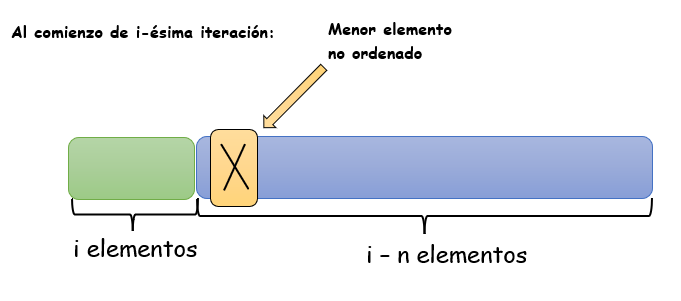

Durante el recorrido del Insertion Sort, $x$ se irá intercambiado con los elementos anteriores hasta llegar a la posición correcta ya que los datos anteriores son menores que el. 

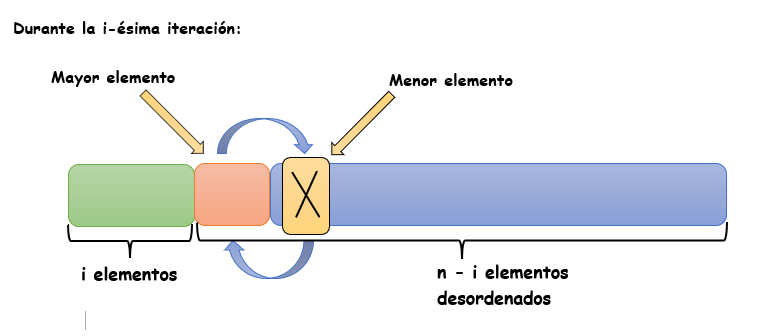

Al finalizar la iteración (y al comienzo de la siguiente), se seguirá cumpliendo la **prioridad invariante**.

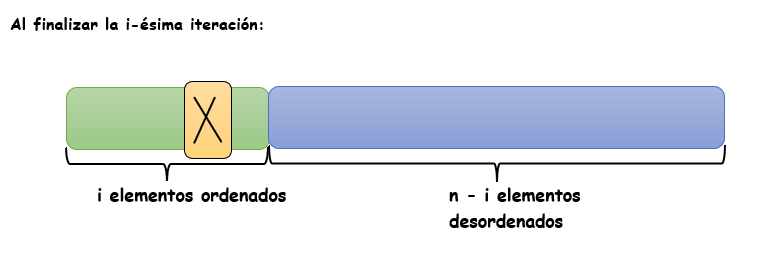

**Correctitud**

Finalmente, como la propiedad del bucle invariante es verdadera al inicio del bucle y se mantiene en cada iteración, podemos decir que al finalizar la i-ésima iteración el arreglo se encontrará ordenado de menor a mayor y con la misma cantidad de elementos, por lo tanto, cumple con su proposito.

##Prueba del teorema (Función BucketSort)

Para demostrar la correctitud de esta función haremos uso de la inducción matemática, para esto deberemos seguir los siguientes pasos.

1. Probar $P(n)$ con un caso base, como por ejemplo $P(1)$.
2. Consideramos que para caso $P(m)$ donde $m < n$ el algortimo es correcto, por lo tanto para $P(n)$ también se cumple.

Para comprobar nuestro caso base $P(1)$, nuestro algoritmo recibirá un arreglo de largo 1 el cual asumirá automaticamente que este se encuentra ordenado.

Para probar nuestro caso segundo caso, consideraremos que el arreglo recibido por nuestra función tendrá un largo de $n$ y luego cada dato ingresado en estos será colocado en sub-arreglos de largo $m < n$ el cual dependará de la cantidad de datos ingresados en cada arreglo, luego estos subarreglos serán ordenados junto a la función InsetionSort la cual ya tiene demostrada su correctitud, por lo tanto para nuestro caso está comprobado.

#5. Experimentos



In [47]:
#Codigo radixSort

cont = 0
def countingSort(arr, exp1):
    n = len(arr)
    global cont 
 
    output = [0] * (n)

    count = [0] * (10)
    for i in range(0, n):
        index = arr[i] // exp1
        count[index % 10] += 1
        cont+= 1

    for i in range(1, 10):
        count[i] += count[i - 1]

 
    i = n - 1
    while i >= 0:
        index = arr[i] // exp1
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1

    i = 0
    for i in range(0, len(arr)):
        arr[i] = output[i]


def radixSort(arr):
 
    max1 = max(arr)
    exp = 1
    while max1 / exp >= 1:
        countingSort(arr, exp)
        exp *= 10

    return cont

In [48]:
arr = [170, 45, 75, 90, 802, 24, 2, 66]
radixSort(arr)
 
for i in range(len(arr)):
    print(arr[i],end=" ")

print(cont)
cont = 0


2 24 45 66 75 90 170 802 24


### **5.1. Comparación de BucketSort frente a RadixSort, CountingSort e InsertionSort**


Dado que la implementación escogida de BucketSort solo ordena números entre 0.0 a 1.0 excluyéndolo, decimales que no pueden ser ordenados por CountingSort o RadixSort, se ecogió por tomar elementos aleatorios entre 0 y 99 para todos los algoritmos distintos al BucketSort, y para este último, considerar el mismo arreglo, pero modificando todos los elementos para que se encuentren dentro del rango, es decir, cada elemento se dividirá por 100.

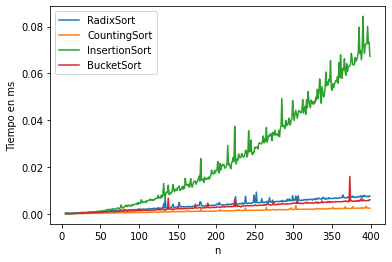

In [70]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
from copy import deepcopy

x=[]
y_radix = []
y_counting = []
y_insertion = []
y_bucket = []

for n in range(5,400):

  r = rd.sample(range(1, 1000), n)
  c = deepcopy(r)
  m = max(r)
  ins = deepcopy(r)
  b = deepcopy(r)
  for i in range(len(b)):
    b[i] = b[i] / 1000

  #la función repeat está ejecutando 20 veces radixSort con el arreglo r y retorna el mejor tiempo obtenido.
  t_radix = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({r})", repeat=1, number=10)
  #la función repeat está ejecutando 20 veces countingSort con el arreglo c y retorna el mejor tiempo obtenido.
  t_counting = repeat(setup="from __main__ import countingSort", stmt=f"countingSort({c},{m})", repeat=1, number=10)
  #la función repeat está ejecutando 20 veces insertion_sort con el arreglo ins y retorna el mejor tiempo obtenido.
  t_insertion = repeat(setup="from __main__ import insertionSort", stmt=f"insertionSort({ins},{False},{0})", repeat=1, number=10)
  #la función repeat está ejecutando 20 veces bucketSort con el arreglo b y retorna el mejor tiempo obtenido.
  t_bucket = repeat(setup="from __main__ import BucketSort", stmt=f"BucketSort({b},{False},{0})", repeat=1, number=10)

  x.append(n)
  y_radix.append(t_radix)
  y_counting.append(t_counting)
  y_insertion.append(t_insertion)
  y_bucket.append(t_bucket)

plt.plot(x,y_radix)
plt.plot(x,y_counting)
plt.plot(x,y_insertion)
plt.plot(x,y_bucket)
plt.legend(["RadixSort","CountingSort","InsertionSort","BucketSort"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

#### **Análisis de los resultados**
Como se puede observar en la gráfica, es correcto afirmar que en los casos promedios la complejidad del los algoritmos RadixSort, CountingSort y BucketSort tienen complejidad lineal, comparados con uno de complejidad cuadrática como lo es InsertionSort. Pero además de eso, podemos ver que el más eficiente es el CountingSort, esto puede deberse a que con anterioridad es calculado el **max(arreglo de entrada)** lo que resta tener que recorrer para encontrar el máximo elemento. Como hipótesis puede que el BucketSort no sea tan eficiente como el CountingSort o el RadixSort debido a que tiene muy poca cantidad de buckets, esto se comprobará en el próximo experimento.

#### Implementación de un BucketSort con 100 buckets

In [73]:
def bucketSort100(A):
    bucket = []
    cant_buckets = 100 
        
    #Ciclo que crea cada bucket
    for i in range(cant_buckets):
        bucket.append([])

    #Ciclo que clasifica cada número para introducirse a su bucket correspondiente
    for j in A:
        index_b = int(cant_buckets * j) #Ejemplo j = 0.55, se multiplica por 100 y se trunca,
        bucket[index_b].append(j)   #entonces se introduce en el bucket de índice 55

    for i in range(cant_buckets):
      #Ordena cada bucket por separado con la función InsertionSort
      bucket[i], cont = insertionSort(bucket[i],False,0)

    #Reemplaza cada elemento del arreglo original por los buckets ordenados por rangos de menor a mayor       
    k = 0
    for i in range(cant_buckets):
        for j in range(len(bucket[i])):
            A[k] = bucket[i][j]
            k += 1

    return A

In [74]:
A = [0.647 , 0.854 , 0.256 , 0.071 , 0.133 , 0.888 , 0.544 , 0.619 , 0.845 , 0.79] 
A = bucketSort100(A)
print("Arreglo final ordenado:", A)

Arreglo final ordenado: [0.071, 0.133, 0.256, 0.544, 0.619, 0.647, 0.79, 0.845, 0.854, 0.888]


### **5.2. Comparación de BucketSort con 10 buckets frente a uno con 100**
Realizamos una modificación a BucketSort, para realizar 100 buckets con intérvalos de una centésima cada uno.

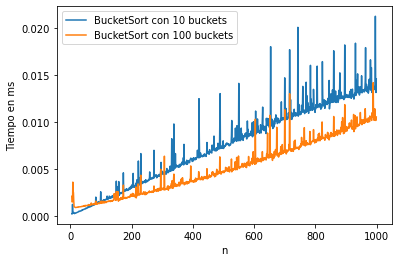

In [86]:
x=[]
y_bucket = []
y_bucket100 = []

for n in range(5,1000):

  b = rd.sample(range(1, 1000), n)
  for i in range(len(b)):
    b[i] = b[i] / 1000
  b100 = deepcopy(b)

  
  #la función repeat está ejecutando 20 veces bucketSort con el arreglo b y retorna el mejor tiempo obtenido.
  t_bucket = repeat(setup="from __main__ import BucketSort", stmt=f"BucketSort({b},{False},{0})", repeat=1, number=10)
  #la función repeat está ejecutando 20 veces bucketSort100 con el arreglo b100 y retorna el mejor tiempo obtenido.
  t_bucket100 = repeat(setup="from __main__ import bucketSort100", stmt=f"bucketSort100({b100})", repeat=1, number=10)

  x.append(n)
  y_bucket.append(t_bucket)
  y_bucket100.append(t_bucket100)

plt.plot(x,y_bucket)
plt.plot(x,y_bucket100)
plt.legend(["BucketSort con 10 buckets","BucketSort con 100 buckets"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

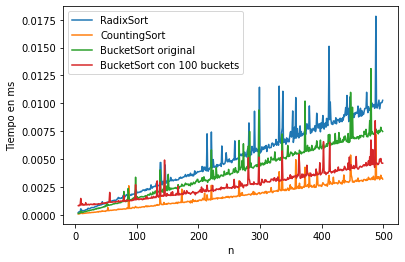

In [85]:
x=[]
y_radix = []
y_counting = []
y_bucket = []
y_bucket100 = []

for n in range(5,500):

  r = rd.sample(range(1, 1000), n)
  c = deepcopy(r)
  m = max(r)
  b = deepcopy(r)
  for i in range(len(b)):
    b[i] = b[i] / 1000
  b100 = deepcopy(b)

  #la función repeat está ejecutando 20 veces radixSort con el arreglo r y retorna el mejor tiempo obtenido.
  t_radix = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({r})", repeat=1, number=10)
  #la función repeat está ejecutando 20 veces countingSort con el arreglo c y retorna el mejor tiempo obtenido.
  t_counting = repeat(setup="from __main__ import countingSort", stmt=f"countingSort({c},{m})", repeat=1, number=10)
  #la función repeat está ejecutando 20 veces bucketSort con el arreglo b y retorna el mejor tiempo obtenido.
  t_bucket = repeat(setup="from __main__ import BucketSort", stmt=f"BucketSort({b},{False},{0})", repeat=1, number=10)
  #la función repeat está ejecutando 20 veces bucketSort100 con el arreglo b100 y retorna el mejor tiempo obtenido.
  t_bucket100 = repeat(setup="from __main__ import bucketSort100", stmt=f"bucketSort100({b100})", repeat=1, number=10)

  x.append(n)
  y_radix.append(t_radix)
  y_counting.append(t_counting)
  y_bucket.append(t_bucket)
  y_bucket100.append(t_bucket100)

plt.plot(x,y_radix)
plt.plot(x,y_counting)
plt.plot(x,y_bucket)
plt.plot(x,y_bucket100)
plt.legend(["RadixSort","CountingSort","BucketSort original","BucketSort con 100 buckets"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

#### **Análisis de los resultados**
Como podemos ver, aumentar la cantidad de buckets cuando hay también una gran cantidad de elementos si funciona para aumentar su eficiencia, ya que BucketSort superaba a su variante hasta que la cantidad de elementos superó a los 100 aproximadamente, ya que desde ese momento fué más útil particionar por 100 intérvalos puesto que la cantidad total de elementos se distribuirá de forma que sean menos por cada bucket en comparación con la versión original. También puede observarse que sin importar cuantas modificaciones a ***fuerza bruta*** realizemos a BucketSort, hay una clara tendencia de que CountingSort lo superará, siendo el más eficiente. Pero puede que alguna modificación que relacione a la **cantidad de buckets** con la **cantidad de elementos** sea la solución, ya que hasta los 250 elementos aproximadamente, *BucketSort100* superó a CountingSort.

#### **Peaks de ejecución**
Sobre los peaks en todos los gráficos se deben a procesos externos del entorno de ejecución, no a anomalías en los algoritmos, como se puede observar en anteriores informes realizados.